# Neural Networks

## Libraries Import

In [33]:
import random

import keras
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import layers

## Configuration

In [34]:
PIXELS_PER_DIMENSION = 28
MAX_PIXEL_VALUE = 255
CLASSES_NAMES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
IMAGES_TO_DISPLAY = 3
VALIDATION_SIZE = 10000
BATCH_SIZE = 20
EPOCHS_COUNT = 30

## Dataset Exploration

In [35]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [36]:
def display_image(pixels: list) -> None:
    pixels = pixels.reshape([PIXELS_PER_DIMENSION, PIXELS_PER_DIMENSION])

    pyplot.gray()
    pyplot.imshow(pixels)
    pyplot.show()

The above image (number 31927 in the dataset) is classified as a 'Sandal'.


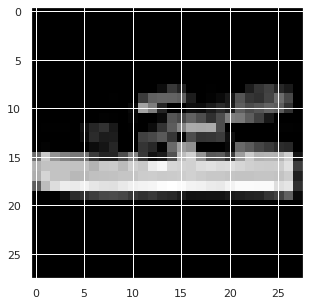

The above image (number 1944 in the dataset) is classified as a 'Sneaker'.


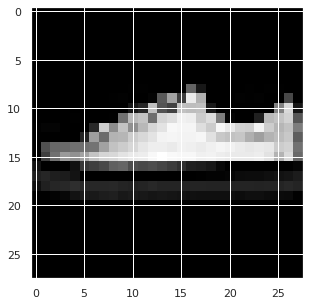

The above image (number 18397 in the dataset) is classified as a 'Bag'.


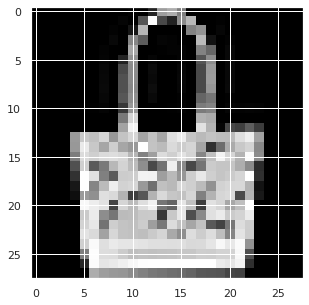

In [37]:
indexes = [random.randint(0, len(X_train)) for _ in range(IMAGES_TO_DISPLAY)]
for index in indexes:
    print("The above image (number {} in the dataset) is classified as a '{}'.".format(index, CLASSES_NAMES[y_train[index]]))

    pixels = X_train[index]
    display_image(pixels)

In [38]:
sns.set(rc={'figure.figsize':(15, 5)})

def plot_labels_distribution(labels: np.array) -> None:
    string_labels = [CLASSES_NAMES[label] for label in labels]

    plot_train = sns.histplot(data=string_labels, shrink=0.9)
    pyplot.xlabel("Labels")
    pyplot.title("Distribution of Labels in Dataset")
    pyplot.show()


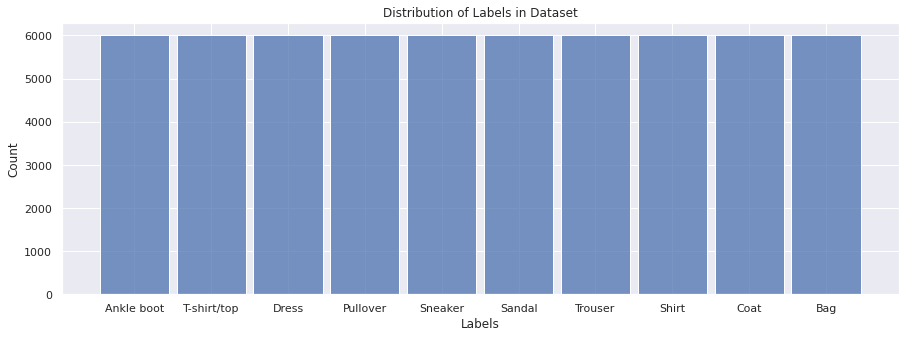

In [39]:
plot_labels_distribution(y_train)

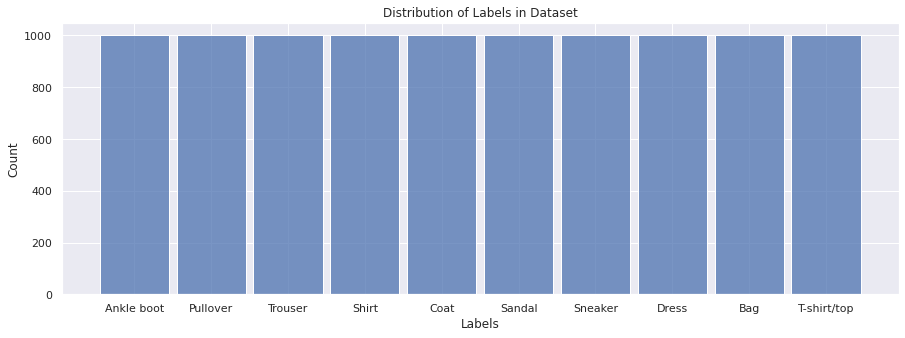

In [40]:
plot_labels_distribution(y_test)

## Preprocessing

In [41]:
X_train = X_train / MAX_PIXEL_VALUE
X_test = X_test / MAX_PIXEL_VALUE

In [42]:
X_validation = X_train[-VALIDATION_SIZE:]
X_train = X_train[:-VALIDATION_SIZE]

y_validation = y_train[-VALIDATION_SIZE:]
y_train = y_train[:-VALIDATION_SIZE]

## Network Training

In [43]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(PIXELS_PER_DIMENSION, PIXELS_PER_DIMENSION), name="flatten"),
        layers.Dense(300, activation="relu", name="dense_1"),
        layers.Dense(100, activation="relu", name="dense_2"),
        layers.Dense(len(CLASSES_NAMES), activation="softmax", name="softmax"),
    ]
)
model.build()

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
softmax (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
weights, thresholds = model.layers[1].get_weights()
print("The weights of the first hidden layer are:\n\n{}\n".format(weights))
print("The thresholds of the first hidden layer are:\n\n{}".format(thresholds))

The weights of the first hidden layer are:

[[-0.00258356 -0.04287695 -0.00080762 ... -0.06088414 -0.01810262
  -0.00501981]
 [ 0.00840638  0.05068494 -0.05901249 ...  0.03504758 -0.05494433
   0.05713125]
 [-0.06164733  0.05779707  0.01213291 ... -0.02423042 -0.02070763
   0.05868194]
 ...
 [-0.05029047 -0.04427202  0.0704903  ...  0.00752795 -0.048204
  -0.05915596]
 [ 0.05128475 -0.0357127   0.06307554 ... -0.02828469  0.01526793
   0.00574511]
 [ 0.07132061  0.05258058  0.04134983 ... -0.04279372 -0.02485666
  -0.01892803]]

The thresholds of the first hidden layer are:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [46]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=EPOCHS_COUNT, batch_size=BATCH_SIZE)

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9263 - accuracy: 0.7037 - val_loss: 0.5222 - val_accuracy: 0.8083
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4762 - accuracy: 0.8344 - val_loss: 0.4983 - val_accuracy: 0.8168
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4294 - accuracy: 0.8505 - val_loss: 0.4168 - val_accuracy: 0.8526
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3964 - accuracy: 0.8585 - val_loss: 0.3947 - val_accuracy: 0.8604
Epoch 5/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.3703 - accuracy: 0.8691 - val_loss: 0.3815 - val_accuracy: 0.8664
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3595 - accuracy: 0.8695 - val_loss: 0.3687 - val_accuracy: 0.8701
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.8789 - val_loss: 0.3690 - val_accuracy:

## Network Evaluation

[]

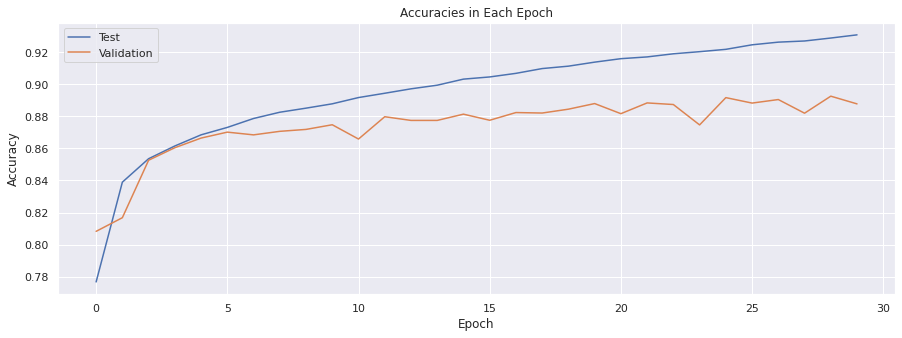

In [47]:
accuracies_per_epoch = list(zip(history.history["accuracy"], history.epoch))
validation_accuracies_per_epoch = list(zip(history.history["val_accuracy"], history.epoch))

accuracies_df = pd.DataFrame(accuracies_per_epoch, columns=["accuracy", "epoch"])
validation_accuracies_df = pd.DataFrame(validation_accuracies_per_epoch, columns=["accuracy", "epoch"])

first_plot = sns.lineplot(data=accuracies_df, x="epoch", y="accuracy", label="Test")
second_plot = sns.lineplot(data=validation_accuracies_df, x="epoch", y="accuracy", label="Validation")
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
pyplot.title("Accuracies in Each Epoch")
pyplot.plot()

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("The model accuracy over the test dataset is: {:.2f}.".format(accuracy))

The model accuracy over the test dataset is: 0.88.


The above image is a 'Ankle boot' and is classified as a 'Ankle boot'.


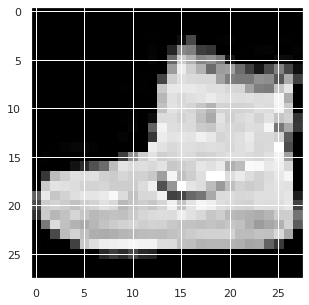

The above image is a 'Pullover' and is classified as a 'Pullover'.


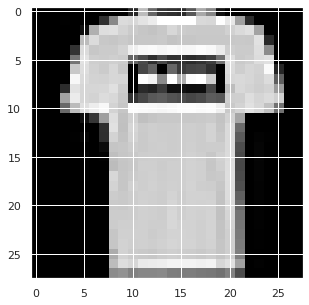

The above image is a 'Trouser' and is classified as a 'Trouser'.


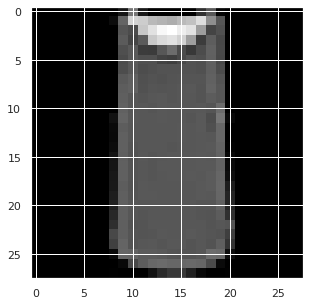

In [49]:
y_pred = model.predict([X_test[:IMAGES_TO_DISPLAY]])

for index in range(IMAGES_TO_DISPLAY):
    current_y_pred = y_pred[index].argmax()
    print("The above image is a '{}' and is classified as a '{}'.".format(CLASSES_NAMES[y_test[index]], CLASSES_NAMES[current_y_pred]))

    pixels = X_train[index]
    display_image(pixels)